In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
data.shape

(614, 13)

In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# Label encoding...

data.replace({'Loan_Status':{'N':0,'Y': 1}},inplace = True)

In [11]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [12]:
data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [13]:
data.replace({'Dependents': {'3+':4}},inplace = True)

In [14]:
data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [15]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


<AxesSubplot:xlabel='Education', ylabel='count'>

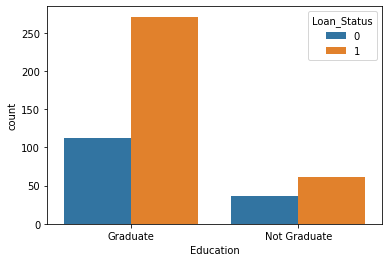

In [16]:
sns.countplot(data= data,x = 'Education',hue = 'Loan_Status')

<AxesSubplot:xlabel='Married', ylabel='count'>

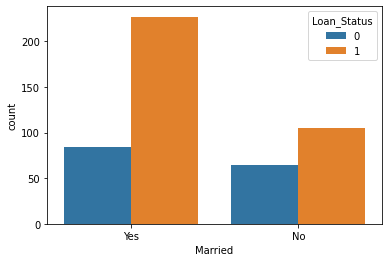

In [17]:
sns.countplot(data= data,x = 'Married',hue = 'Loan_Status')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

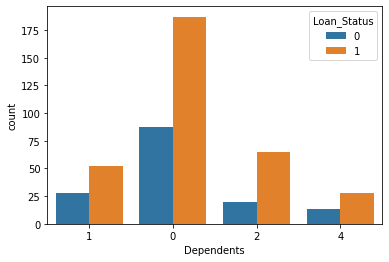

In [18]:
sns.countplot(data= data,x = 'Dependents',hue = 'Loan_Status')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

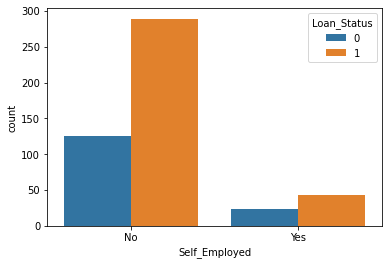

In [19]:
sns.countplot(data= data,x = 'Self_Employed',hue = 'Loan_Status')

<AxesSubplot:xlabel='Gender', ylabel='count'>

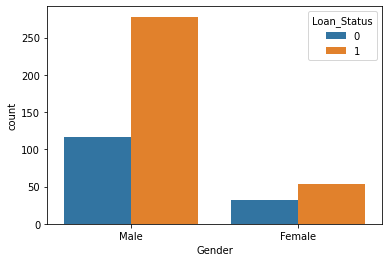

In [20]:
sns.countplot(data = data,x = 'Gender',hue = 'Loan_Status')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

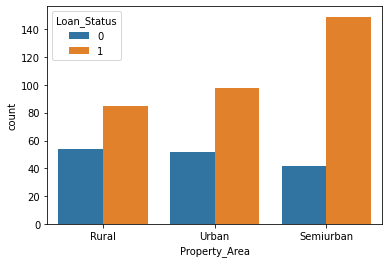

In [21]:
sns.countplot(data= data,x = 'Property_Area',hue = 'Loan_Status')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

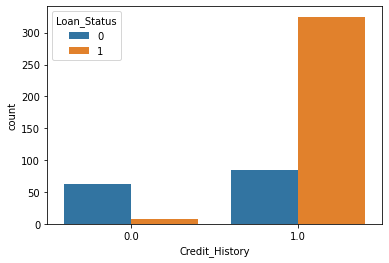

In [22]:
sns.countplot(data= data,x = 'Credit_History',hue = 'Loan_Status')

In [23]:
data.replace({'Married':{'No':0,'Yes': 1}},inplace = True)

In [24]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,1,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [25]:
data.replace({'Education':{'Not Graduate':0,'Graduate': 1}},inplace = True)

In [26]:
data.replace({'Self_Employed':{'No':0,'Yes': 1}},inplace = True)

In [27]:
data.replace({'Gender':{'Female':0,'Male': 1}},inplace = True)

In [28]:
data.replace({'Property_Area':{'Rural':0,'Urban': 1,'Semiurban':2}},inplace = True)

In [29]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


<AxesSubplot:>

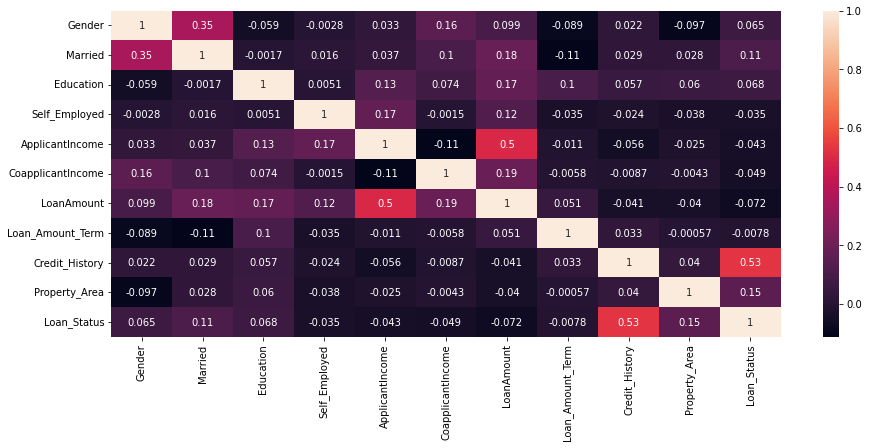

In [30]:
plt.figure(figsize=(15,6))

sns.heatmap(data.corr(),annot = True)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

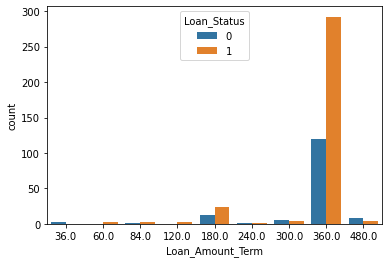

In [31]:
sns.countplot(data= data,x = 'Loan_Amount_Term',hue = 'Loan_Status')

In [32]:
X = data.drop(columns = ['Loan_Status','Loan_ID'],axis =1)
y = data['Loan_Status']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lm = LogisticRegression()

lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
predictions

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1])

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [38]:
print(confusion_matrix(y_test,predictions))

[[ 17  30]
 [  1 111]]


In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.36      0.52        47
           1       0.79      0.99      0.88       112

    accuracy                           0.81       159
   macro avg       0.87      0.68      0.70       159
weighted avg       0.83      0.81      0.77       159



In [40]:
accuracy_score(y_test,predictions)

0.8050314465408805